## Importing Important Libraries

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from skimage import io
from shutil import copyfile
import sys
import time
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array


## To download the data

In [2]:
# import wget
# #url = 'https://storage.googleapis.com/openimages/2018_04/train/train-annotations-bbox.csv'
# #filename = wget.download(url)

In [3]:
# url = 'https://storage.googleapis.com/openimages/2018_04/train/train-images-boxable-with-rotation.csv'
# #filename = wget.download(url)

In [4]:
# url = 'https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv'
# #filename = wget.download(url

## Readind Datasets

In [5]:
images_boxable_file = 'train-images-boxable-with-rotation.csv' ## containing bounding boxe
annotations_bbox_file = 'train-annotations-bbox.csv'
class_descriptions_file = 'class-descriptions-boxable.csv'

In [6]:
images_boxable = pd.read_csv(images_boxable_file)
images_boxable.head()

ImageID Subset                                        OriginalURL  \
0  4fa8054781a4c382  train  https://farm3.staticflickr.com/5310/5898076654...   
1  b37f763ae67d0888  train  https://c1.staticflickr.com/1/67/197493648_628...   
2  7e8584b0f487cb9e  train  https://c7.staticflickr.com/8/7056/7143870979_...   
3  86638230febe21c4  train  https://farm5.staticflickr.com/5128/5301868579...   
4  249086e72671397d  train  https://c6.staticflickr.com/4/3930/15342460029...   

                                  OriginalLandingURL  \
0  https://www.flickr.com/photos/michael-beat/589...   
1  https://www.flickr.com/photos/drstarbuck/19749...   
2  https://www.flickr.com/photos/circasassy/71438...   
3  https://www.flickr.com/photos/ajcreencia/53018...   
4  https://www.flickr.com/photos/codnewsroom/1534...   

                                        License  \
0  https://creativecommons.org/licenses/by/2.0/   
1  https://creativecommons.org/licenses/by/2.0/   
2  https://creativecommons.org/licenses/by/2.0/   
3  https://creativecommons.org/licenses/by/2.0/   
4  https://creativecommons.org/licenses/by/2.0/   

                              AuthorProfileURL        Author  \
0  https://www.flickr.com/people/michael-beat/  Michael Beat   
1    https://www.flickr.com/people/drstarbuck/         Karen   
2    https://www.flickr.com/people/circasassy/    CircaSassy   
3    https://www.flickr.com/people/ajcreencia/          Alex   
4   https://www.flickr.com/people/codnewsroom/  COD Newsroom   

                                               Title  OriginalSize  \
0                                   ...die FNF-Kerze       4405052   
1                               Three boys on a hill        494555   
2  A Christmas carol and The cricket on the heart...       2371584   
3                                    Abbey and Kenny        949267   
4  Suburban Law Enforcement Academy 20th Annivers...       6541758   

                OriginalMD5  \
0  KFukvivpCM5QXl5SqKe41g==   
1  9IzEn38GRNsVpATuv7gzEA==   
2  3hQwu0iSzY1VIoXiwp0/Mg==   
3  onB+rCZnGQg5PRX7xOs18Q==   
4  MjpaAVbMAWbCusSaxI1D7w==   

                                    Thumbnail300KURL  Rotation  
0  https://c1.staticflickr.com/6/5310/5898076654_...       0.0  
1  https://c3.staticflickr.com/1/67/197493648_628...       0.0  
2  https://c7.staticflickr.com/8/7056/7143870979_...       0.0  
3  https://c4.staticflickr.com/6/5128/5301868579_...       NaN  
4  https://c1.staticflickr.com/4/3930/15342460029...       0.0

In [7]:
annotations_bbox = pd.read_csv(annotations_bbox_file) 
annotations_bbox.head()

ImageID  Source  LabelName  Confidence      XMin      XMax  \
0  000002b66c9c498e  xclick  /m/01g317           1  0.012500  0.195312   
1  000002b66c9c498e  xclick  /m/01g317           1  0.025000  0.276563   
2  000002b66c9c498e  xclick  /m/01g317           1  0.151562  0.310937   
3  000002b66c9c498e  xclick  /m/01g317           1  0.256250  0.429688   
4  000002b66c9c498e  xclick  /m/01g317           1  0.257812  0.346875   

       YMin      YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  \
0  0.148438  0.587500           0            1          0            0   
1  0.714063  0.948438           0            1          0            0   
2  0.198437  0.590625           1            0          0            0   
3  0.651563  0.925000           1            0          0            0   
4  0.235938  0.385938           1            0          0            0   

   IsInside  
0         0  
1         0  
2         0  
3         0  
4         0

In [8]:
class_descriptions = pd.read_csv(class_descriptions_file, header=None)
class_descriptions.head()

0           1
0    /m/011k07    Tortoise
1  /m/011q46kg   Container
2    /m/012074      Magpie
3    /m/0120dh  Sea turtle
4    /m/01226z    Football

## Plotting image with bounding Boxes

In [9]:
# Code for plotting bounding box
def plot_bbox(img_id):
    ## reading image
    img_url = images_boxable.loc[images_boxable["ImageID"]==img_id]['OriginalURL'].values[0] 
    img = io.imread(img_url)
    height, width, channel = img.shape
    print(f"Image: {img.shape}")
    ## getting bounding boxes
    bboxs = annotations_bbox[annotations_bbox['ImageID']==img_id]
    for index, row in bboxs.iterrows():
        xmin = row['XMin']
        xmax = row['XMax']
        ymin = row['YMin']
        ymax = row['YMax']
        xmin = int(xmin*width)
        xmax = int(xmax*width)
        ymin = int(ymin*height)
        ymax = int(ymax*height)
        label_name = row['LabelName']
        class_series = class_descriptions[class_descriptions[0]==label_name]
        class_name = class_series[1].values[0]
        print(f"Coordinates: {xmin,ymin}, {xmax,ymax}")
        ## bounding box via rectange
        cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,0,0), 5)
        font = cv2.FONT_HERSHEY_SIMPLEX
        ## adding class name
        cv2.putText(img, class_name, (xmin,ymin-10), font, 3, (0,255,0), 5)
    plt.figure(figsize=(15,10))
    plt.title('Image with Bounding Box')
    plt.imshow(img)
    plt.axis("off")
    plt.show()

Image: (2304, 3072, 3)
Coordinates: (0, 0), (3070, 2302)


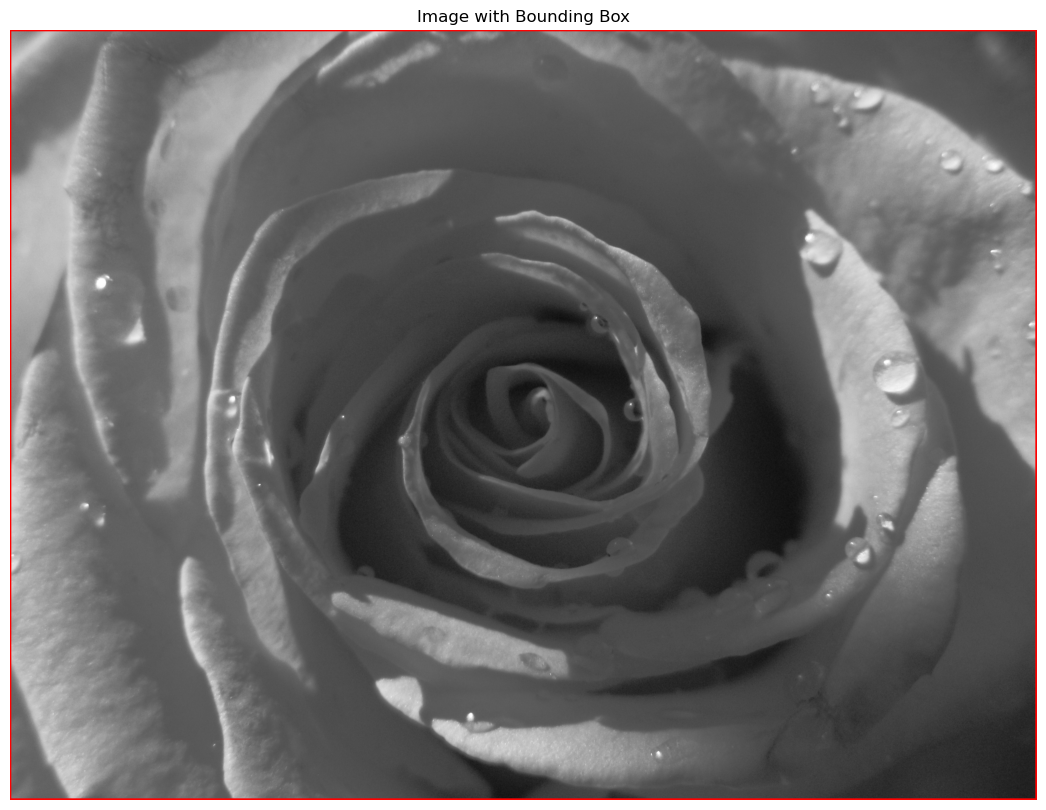

Image: (960, 1280, 3)
Coordinates: (436, 61), (809, 919)


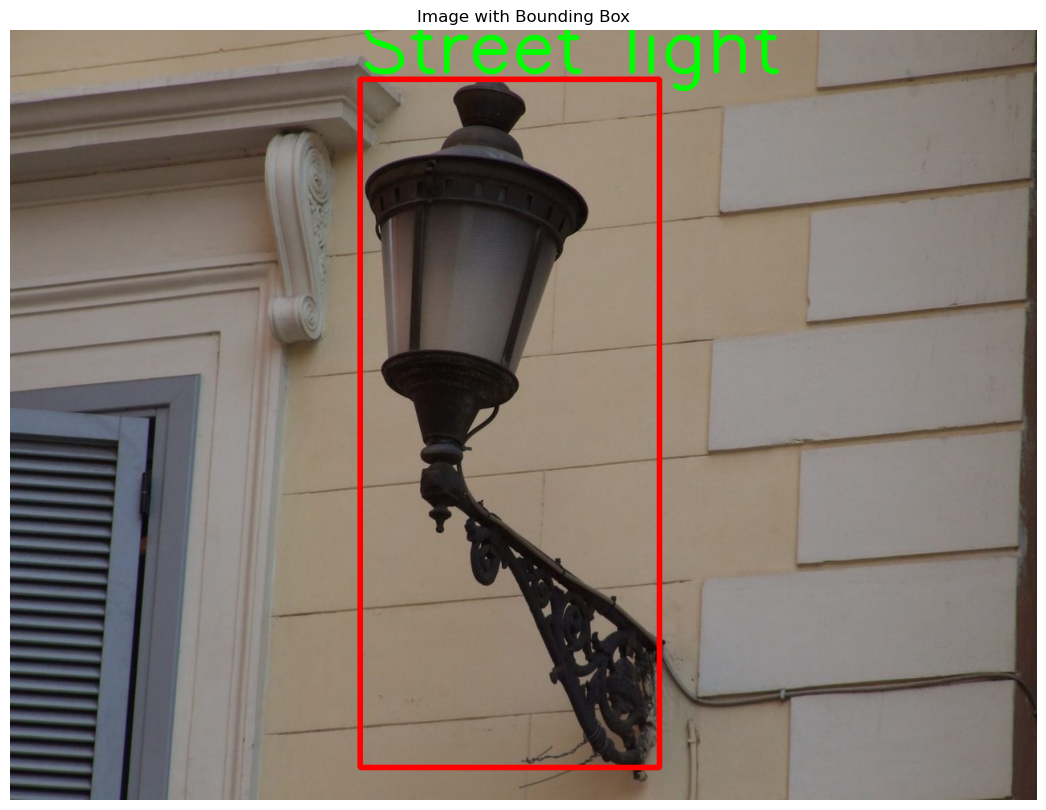

In [13]:
least_objects_img_ids = annotations_bbox["ImageID"].value_counts().tail(500).index.values

for img_id in random.sample(list(least_objects_img_ids), 2):
    plot_bbox(img_id)

## Taking subset of only three classes

In [14]:
class_descriptions[1].count()

601

In [15]:
# Find the label_name for 'Bed', 'Chair' and 'Table' classes
bed_pd = class_descriptions[class_descriptions[1]=='Bed']
chair_pd = class_descriptions[class_descriptions[1]=='Chair']
table_pd = class_descriptions[class_descriptions[1]=='Table']

In [16]:
label_name_bed = bed_pd[0].values[0]
label_name_chair = chair_pd[0].values[0]
label_name_table = table_pd[0].values[0]

label_name_bed

'/m/03ssj5'

In [17]:
bed_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_bed]
chair_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_chair]
table_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_table]

bed_bbox

ImageID     Source  LabelName  Confidence      XMin  \
5953      00041cc3701f7805     xclick  /m/03ssj5           1  0.135112   
5954      00041cc3701f7805     xclick  /m/03ssj5           1  0.179862   
9974      00074503ceae5131     xclick  /m/03ssj5           1  0.000000   
13671     000a54f1bdb96839     xclick  /m/03ssj5           1  0.000000   
17469     000da932ca7e68e4     xclick  /m/03ssj5           1  0.000000   
...                    ...        ...        ...         ...       ...   
14585203  ff7f55b7f6794f63     xclick  /m/03ssj5           1  0.000000   
14595452  ffb716498f082103     xclick  /m/03ssj5           1  0.180000   
14600295  ffce182988b6b746     xclick  /m/03ssj5           1  0.000000   
14602507  ffd718211ba34626  activemil  /m/03ssj5           1  0.006250   
14602925  ffd95054b5fa8ba3     xclick  /m/03ssj5           1  0.000000   

              XMax      YMin      YMax  IsOccluded  IsTruncated  IsGroupOf  \
5953      0.366609  0.420573  0.625000           1            0          0   
5954      0.405336  0.436198  0.856771           0            0          0   
9974      0.999375  0.000000  0.999062           1            1          0   
13671     0.999167  0.028125  0.999375           0            1          0   
17469     0.753125  0.328330  0.993433           1            0          0   
...            ...       ...       ...         ...          ...        ...   
14585203  0.999375  0.000000  0.997500           1            1          0   
14595452  0.998750  0.309568  0.998124           0            0          0   
14600295  0.305625  0.707317  0.999062           0            1          0   
14602507  0.207500  0.373333  0.805000           1            1          0   
14602925  0.928125  0.825000  0.999167           1            1          0   

          IsDepiction  IsInside  
5953                0         0  
5954                0         0  
9974                0         0  
13671               0         0  
17469               0         0  
...               ...       ...  
14585203            0         0  
14595452            0         0  
14600295            0         0  
14602507            0         0  
14602925            0         0  

[3563 rows x 13 columns]

In [18]:
print('There are %d beds in the dataset' %(len(bed_bbox)))
print('There are %d chairs in the dataset' %(len(chair_bbox)))
print('There are %d tables in the dataset' %(len(table_bbox)))

There are 3563 beds in the dataset
There are 132483 chairs in the dataset
There are 85691 tables in the dataset


In [19]:
bed_img_id = bed_bbox['ImageID']
chair_img_id = chair_bbox['ImageID']
table_img_id = table_bbox['ImageID']

## Creating data frame of 10 images

In [20]:
# working on 10 images
n = 10
subbed_img_id = random.sample(list(bed_img_id), n) ## take random 10 image ids
subchair_img_id = random.sample(list(chair_img_id), n)
subtable_img_id = random.sample(list(table_img_id), n)

In [21]:
subbed_pd = images_boxable.loc[images_boxable['ImageID'].isin(subbed_img_id)]
subchair_pd = images_boxable.loc[images_boxable['ImageID'].isin(subchair_img_id)]
subtable_pd = images_boxable.loc[images_boxable['ImageID'].isin(subtable_img_id)]

In [22]:
print("Beds:",subbed_pd.shape, "Chair:", subchair_pd.shape, "Tables:", subtable_pd.shape)

Beds: (10, 12) Chair: (10, 12) Tables: (10, 12)


In [23]:
subbed_pd.head()


ImageID Subset  \
461472  09ace300b204561e  train   
512003  7417a656c6790a91  train   
526008  05cdb2df58dcc07b  train   
625384  e82aea4f78425649  train   
781831  18324ce7f869e3f2  train   

                                              OriginalURL  \
461472  https://c7.staticflickr.com/9/8391/8466063917_...   
512003  https://farm2.staticflickr.com/3951/1547814139...   
526008  https://c4.staticflickr.com/1/11/17483464_7762...   
625384  https://c2.staticflickr.com/7/6085/6062640851_...   
781831  https://farm3.staticflickr.com/8075/8327939931...   

                                       OriginalLandingURL  \
461472  https://www.flickr.com/photos/wicker-furniture...   
512003  https://www.flickr.com/photos/andypowe11/15478...   
526008      https://www.flickr.com/photos/quirky/17483464   
625384  https://www.flickr.com/photos/ccordova/6062640851   
781831  https://www.flickr.com/photos/danramarch/83279...   

                                             License  \
461472  https://creativecommons.org/licenses/by/2.0/   
512003  https://creativecommons.org/licenses/by/2.0/   
526008  https://creativecommons.org/licenses/by/2.0/   
625384  https://creativecommons.org/licenses/by/2.0/   
781831  https://creativecommons.org/licenses/by/2.0/   

                                       AuthorProfileURL             Author  \
461472  https://www.flickr.com/people/wicker-furniture/    Wicker Paradise   
512003        https://www.flickr.com/people/andypowe11/        Andy Powell   
526008            https://www.flickr.com/people/quirky/       Wendy Harman   
625384          https://www.flickr.com/people/ccordova/  Christian Córdova   
781831        https://www.flickr.com/people/danramarch/     Daniel Ramirez   

                                                    Title  OriginalSize  \
461472  #chihuahua #cute #dog #pillow #pet by @yiamcha...         81599   
512003                                           DSC_9025       7217982   
526008                                          Bar study        365770   
625384                          Habitación Hotel Morrison       5693290   
781831                USS Missouri - Supply Officer Cabin        784756   

                     OriginalMD5  \
461472  oOI1tiKeVQ92eNaHI6vyvw==   
512003  CmIvKxcFEp6bEg4SdiS7Cg==   
526008  mcy6KhCUyTk2Z2PD+cV2cA==   
625384  fmyUsKvrYTBemHnkZ2KvIw==   
781831  d7F893Qof6oatpONZwfokA==   

                                         Thumbnail300KURL  Rotation  
461472  https://c8.staticflickr.com/9/8391/8466063917_...       NaN  
512003  https://c1.staticflickr.com/4/3951/15478141399...       0.0  
526008  https://c7.staticflickr.com/1/11/17483464_7762...       0.0  
625384  https://c4.staticflickr.com/7/6085/6062640851_...       0.0  
781831  https://c3.staticflickr.com/9/8075/8327939931_...       0.0

In [24]:
subbed_dict = subbed_pd[["ImageID", "OriginalURL"]].set_index('ImageID')["OriginalURL"].to_dict()
subchair_dict = subchair_pd[["ImageID", "OriginalURL"]].set_index('ImageID')["OriginalURL"].to_dict()
subtable_dict = subtable_pd[["ImageID", "OriginalURL"]].set_index('ImageID')["OriginalURL"].to_dict()

In [25]:
mappings = [subbed_dict, subchair_dict, subtable_dict]


In [26]:
len(mappings)

3

In [27]:
classes = ['Bed', 'Chair', 'Table']


## Making dataset in the format for Faster Rcnn
- image link, bounding boxes, classes and annotation text file in separate.

In [28]:
# download images in folders(Bed, Chair and table folder with 10 images each)

for idx, obj_type in enumerate(classes):
    n_issues = 0 
    # create the directory
    if not os.path.exists(obj_type):
        os.mkdir(obj_type)
    for img_id, url in mappings[idx].items():
        try:
            img = io.imread(url)
            saved_path = os.path.join(obj_type, img_id+".jpg")
            io.imsave(saved_path, img)
        except Exception as e:
            n_issues += 1
    print(f"Images Issues: {n_issues}")

Images Issues: 2
Images Issues: 2
Images Issues: 0


## Saving in Training and Testing Directory

In [29]:
# save images to train and test directory, so create 2 folders
train_path = 'train'
test_path = 'test'

In [30]:
for i in range(len(classes)):
    all_imgs = os.listdir(classes[i])
    all_imgs = [f for f in all_imgs if not f.startswith('.')]
    random.shuffle(all_imgs)
    
    limit = int(n*0.8) # 80% data for training and 20% for testing

    train_imgs = all_imgs[:limit]
    test_imgs = all_imgs[limit:]
    
    
    for j in range(len(train_imgs)):
        original_path = os.path.join(classes[i], train_imgs[j])
        new_path = os.path.join(train_path, train_imgs[j])
        copyfile(original_path, new_path)
    

    for j in range(len(test_imgs)):
        original_path = os.path.join(classes[i], test_imgs[j])
        new_path = os.path.join(test_path, test_imgs[j])
        copyfile(original_path, new_path)

In [31]:
train_img_count = os.listdir('train')
print("Number of images in train found: ", len(train_img_count))

Number of images in train found:  24


In [32]:
test_img_count = os.listdir('test')
print("Number of images in train found: ", len(test_img_count))

Number of images in train found:  2


In [33]:
label_names = [label_name_bed, label_name_chair, label_name_table]

train_df = pd.DataFrame(columns=['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'])

# Find boxes in each image and put them in a dataframe
train_imgs = os.listdir(train_path)
train_imgs = [name for name in train_imgs if not name.startswith('.')]

for i in range(len(train_imgs)):
    sys.stdout.write('Parse train_imgs ' + str(i) + '; Number of boxes: ' + str(len(train_df)) + '\r')
    sys.stdout.flush()
    img_name = train_imgs[i]
    img_id = img_name[0:16]
    tmp_df = annotations_bbox[annotations_bbox['ImageID']==img_id]
    for index, row in tmp_df.iterrows():
        labelName = row['LabelName']
        for i in range(len(label_names)):
            if labelName == label_names[i]:
                train_df = train_df.append({'FileName': img_name, 
                                             'XMin': row['XMin'], 
                                            'XMax': row['XMax'], 
                                            'YMin': row['YMin'], 
                                            'YMax': row['YMax'], 
                                            'ClassName': classes[i]}, 
                                           ignore_index=True)

Image: (1200, 1600, 3)
Coordinates: (0, 162), (1599, 1199)


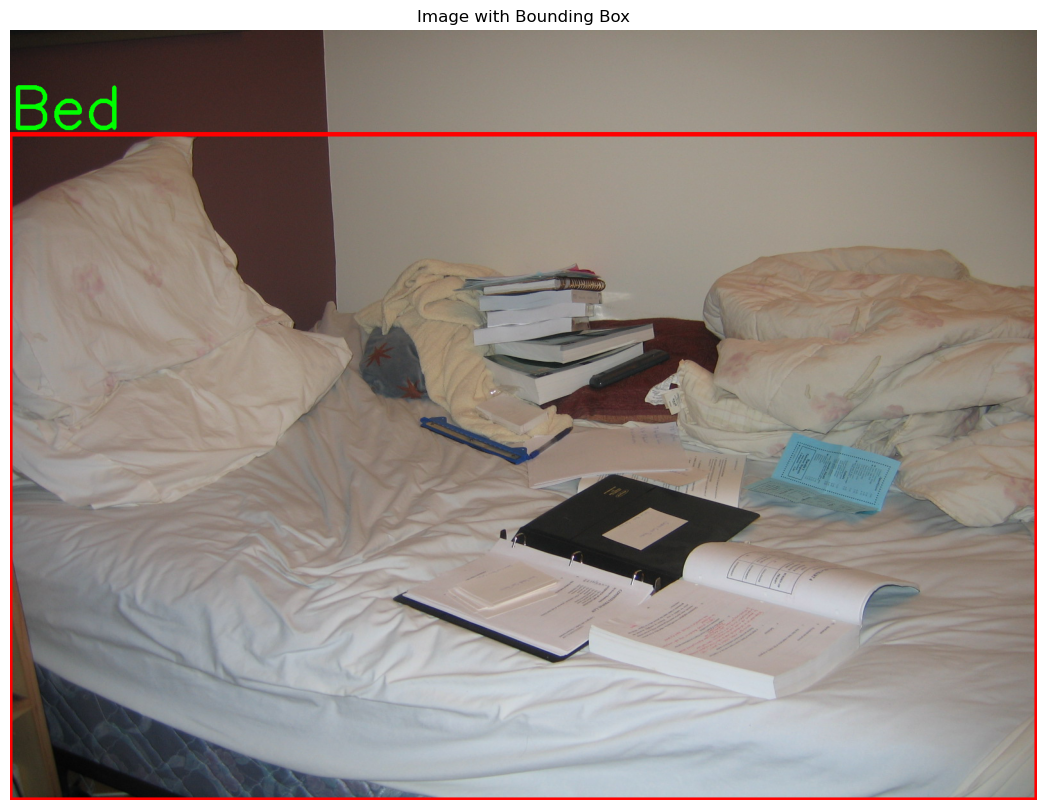

Image: (640, 640, 3)
Coordinates: (535, 322), (627, 462)
Coordinates: (8, 282), (36, 390)
Coordinates: (238, 339), (317, 395)
Coordinates: (282, 292), (310, 354)
Coordinates: (459, 277), (484, 357)
Coordinates: (486, 282), (510, 347)
Coordinates: (562, 282), (586, 330)
Coordinates: (592, 281), (619, 368)
Coordinates: (0, 177), (111, 298)
Coordinates: (162, 254), (282, 347)
Coordinates: (497, 215), (542, 262)
Coordinates: (499, 187), (548, 228)
Coordinates: (518, 252), (562, 302)
Coordinates: (0, 508), (141, 639)
Coordinates: (300, 432), (638, 639)


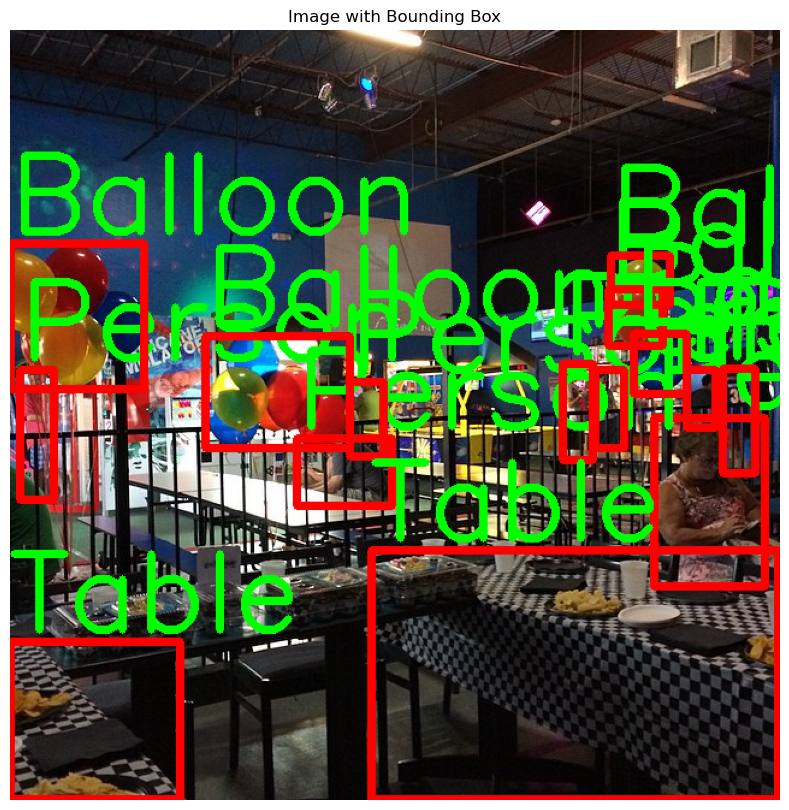

Image: (3104, 4672, 3)
Coordinates: (2190, 513), (3530, 3104)
Coordinates: (2017, 1506), (3518, 2949)
Coordinates: (0, 1559), (3740, 3101)
Coordinates: (4070, 2333), (4669, 3101)


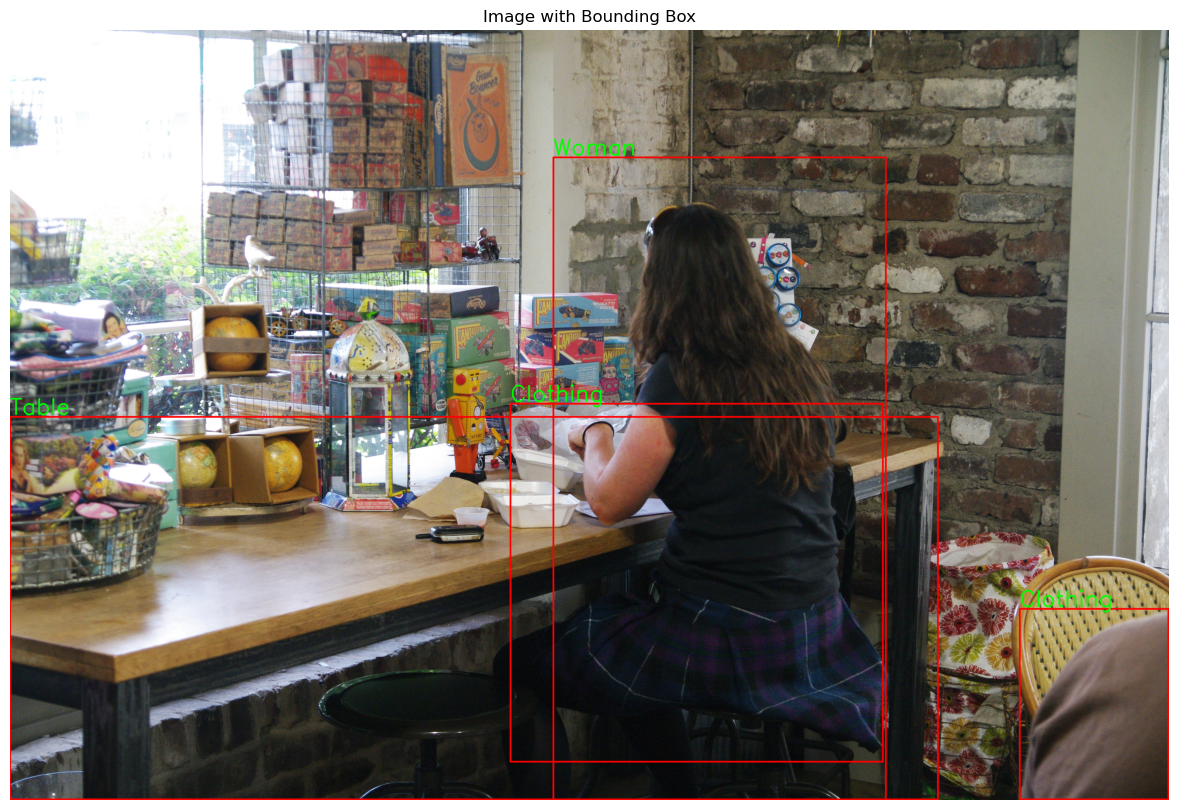

Image: (2448, 3264, 3)
Coordinates: (752, 760), (2207, 1891)
Coordinates: (2, 0), (414, 461)
Coordinates: (28, 97), (283, 271)


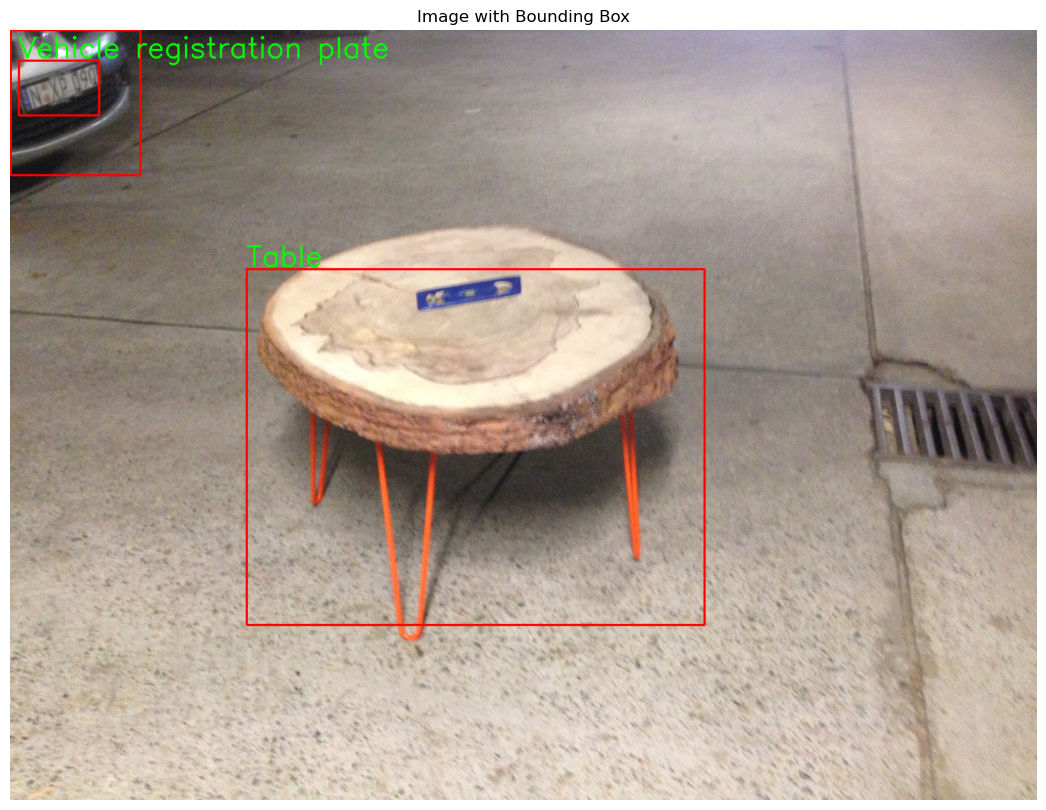

In [34]:
train_img_ids = train_df["FileName"].head().str.split(".").str[0].unique() # plotting the bounding box
for img_id in train_img_ids:
    plot_bbox(img_id)

In [35]:
val_df = pd.DataFrame(columns=['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'])

test_df = pd.DataFrame(columns=['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'])

# find boxes in each image and put them in a dataframe
test_imgs = os.listdir(test_path)
test_imgs = [name for name in test_imgs if not name.startswith('.')]

for i in range(len(test_imgs)):
    sys.stdout.write('Parse test_imgs ' + str(i) + '; Number of boxes: ' + str(len(test_df)) + '\r')
    sys.stdout.flush()
    img_name = test_imgs[i]
    img_id = img_name[0:16]
    tmp_df = annotations_bbox[annotations_bbox['ImageID']==img_id]
    for index, row in tmp_df.iterrows():
        labelName = row['LabelName']
        for i in range(len(label_names)):
            if labelName == label_names[i]:
                val_df = val_df.append({'FileName': img_name, 
                                            'XMin': row['XMin'], 
                                            'XMax': row['XMax'], 
                                            'YMin': row['YMin'], 
                                            'YMax': row['YMax'], 
                                            'ClassName': classes[i]}, 
                                           ignore_index=True)

In [36]:
train_df.to_csv('train.csv')
test_df.to_csv('test.csv')

## Annotation file

In [37]:
#Write train.csv to annotation.txt

train_df = pd.read_csv('train.csv')

# for training
with open("annotation.txt", "w+") as f:
    for idx, row in train_df.iterrows():
        img = cv2.imread('train/' + row['FileName'])
        height, width = img.shape[:2]
        x1 = int(row['XMin'] * width)
        x2 = int(row['XMax'] * width)
        y1 = int(row['YMin'] * height)
        y2 = int(row['YMax'] * height)

        train_file_path = 'train'
        fileName = os.path.join(train_file_path, row['FileName'])
        className = row['ClassName']
        f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')

In [38]:
train_df

Unnamed: 0              FileName      XMin      XMax      YMin      YMax  \
0             0  05cdb2df58dcc07b.jpg  0.000000  0.999375  0.135000  0.999167   
1             1  08964a9785b85bbe.jpg  0.000000  0.220313  0.793750  0.998438   
2             2  08964a9785b85bbe.jpg  0.468750  0.996875  0.676562  0.998438   
3             3  0dd91934160e7ba6.jpg  0.000000  0.800625  0.502352  0.999059   
4             4  0de19ba823619c16.jpg  0.230625  0.676250  0.310833  0.772500   
..          ...                   ...       ...       ...       ...       ...   
140         140  e82aea4f78425649.jpg  0.138750  0.311250  0.520302  0.894240   
141         141  e82aea4f78425649.jpg  0.432500  0.531250  0.465534  0.542965   
142         142  f9c7f46a89dfd631.jpg  0.353125  0.999375  0.352222  0.998889   
143         143  f9c7f46a89dfd631.jpg  0.700625  0.999375  0.223333  0.526667   
144         144  fa32c6d4cc87f477.jpg  0.002344  0.408594  0.577083  1.000000   

    ClassName  
0         Bed  
1       Table  
2       Table  
3       Table  
4       Table  
..        ...  
140     Table  
141     Table  
142       Bed  
143       Bed  
144       Bed  

[145 rows x 7 columns]

In [39]:
test_df = pd.read_csv('test.csv')

# for test
with open("test_annotation.txt", "w+") as f:
    for idx, row in test_df.iterrows():
        sys.stdout.write(str(idx) + '\r')
        sys.stdout.flush()
        img = cv2.imread('test/' + row['FileName'])
        height, width = img.shape[:2]
        x1 = int(row['XMin'] * width)
        x2 = int(row['XMax'] * width)
        y1 = int(row['YMin'] * height)
        y2 = int(row['YMax'] * height)

        test_file_path = 'test'
        fileName = os.path.join(test_file_path, row['FileName'])
        className = row['ClassName']
        f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')